In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('2018_2019_24-59mos_wasting_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'wasting'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,wasting
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,0
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,0
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


# FEATURE SELECTION USING CHI2

In [3]:
X = df.iloc[:,0:39]
y = df.iloc[:,-1]
feature = SelectKBest(score_func=chi2, k=10)
fit = feature.fit(X,y)

In [4]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
features = pd.concat([dfcolumns,dfscores], axis = 1)
features.columns = ['Overweight','Scores']
features

,Overweight,Scores
0,age_child,1.232378
1,agemos,7.917844
2,AgeGroup,0.508732
3,sex_child,2.396964
4,gastation,0.050001
5,place_delivery,0.001178
6,assistd,0.013237
7,typeofd,1.417826
8,pregtype,0.000953
9,bw_grams,7213.954803


In [6]:
print(features.nlargest(10, "Scores"))

       Overweight       Scores
9        bw_grams  7213.954803
23        psoc_hh   114.525130
34       wcooking    49.594435
32      drinksafe    33.914168
33       makesafe    21.776484
15     psccat_mom    19.916378
22        educ_hh     9.527843
17      occup_mom     7.966436
1          agemos     7.917844
28  drinkingwater     6.558391


In [8]:
data = df[["bw_grams","psoc_hh","wcooking","drinksafe","makesafe",
           "psccat_mom","educ_hh","occup_mom","agemos","drinkingwater","wasting"]]

In [9]:
data.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'drinksafe', 'makesafe',
       'psccat_mom', 'educ_hh', 'occup_mom', 'agemos', 'drinkingwater',
       'wasting'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442 entries, 0 to 14441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   bw_grams       14442 non-null  int64
 1   psoc_hh        14442 non-null  int64
 2   wcooking       14442 non-null  int64
 3   drinksafe      14442 non-null  int64
 4   makesafe       14442 non-null  int64
 5   psccat_mom     14442 non-null  int64
 6   educ_hh        14442 non-null  int64
 7   occup_mom      14442 non-null  int64
 8   agemos         14442 non-null  int64
 9   drinkingwater  14442 non-null  int64
 10  wasting        14442 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [11]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 123'

In [12]:
data = data.drop_duplicates()

In [13]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 0'

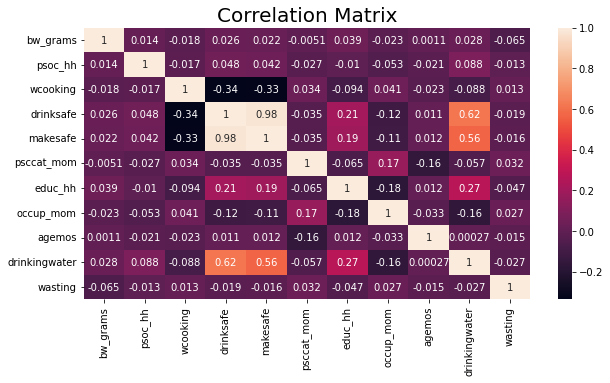

In [14]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.03218199 0.05887155 0.0257401  0.01618881 0.0059761  0.01042269
 0.00833867 0.00723599 0.00308672 0.06204387 0.00982382 0.01147392
 0.05878643 0.01816491 0.03335369 0.02313333 0.03790466 0.02292728
 0.01594282 0.05893631 0.02815345 0.01253118 0.03393838 0.04670417
 0.00754622 0.02452676 0.05106262 0.02034657 0.01335524 0.02365492
 0.00817508 0.00969176 0.02084587 0.02541617 0.04770152 0.04607168
 0.01890093 0.02307257 0.01777128]


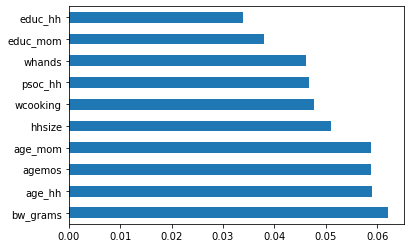

In [16]:
f_importances = pd.Series(model.feature_importances_, index = X.columns)
f_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
#shape of the data
df.shape

(14442, 42)

In [18]:
df.isnull().sum()

age_child          0
agemos             0
AgeGroup           0
sex_child          0
gastation          0
place_delivery     0
assistd            0
typeofd            0
pregtype           0
bw_grams           0
bw_status          0
ethnicity          0
age_mom            0
agegroup_mom       0
csc_mom            0
psccat_mom         0
educ_mom           0
occup_mom          0
work_status_mom    0
age_hh             0
agegroup_HH        0
sex_hh             0
educ_hh            0
psoc_hh            0
work_status_hh     0
urbanity           0
hhsize             0
hhsize_code        0
drinkingwater      0
recipient_4ps      0
toilet             0
electrct1          0
drinksafe          0
makesafe           0
wcooking           0
whands             0
collect            0
burn               0
composting         0
dump               0
segregate          0
wasting            0
dtype: int64

In [20]:
x = df.drop(['wasting'], axis=1)
y = df['wasting']

In [21]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [22]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [23]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.3s finished

[2022-11-08 17:09:11] Features: 1/10 -- score: -0.047123979710817256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.6s finished

[2022-11-08 17:09:11] Features: 2/10 -- score: -0.047037953023447474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s finished

[2022-11-08 17:09:12] Features: 3/10 -- score: -0.04698030955636274[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

In [24]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['sex_child', 'typeofd', 'bw_grams', 'bw_status', 'psccat_mom', 'educ_hh', 'drinkingwater', 'toilet', 'electrct1', 'composting']
